In [289]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

Sử dụng `Gradient Descent` để tìm nghiệm cho giá trị nhỏ nhất chính là nghiệm cho cực tiểu trên toàn hàm `loss`.

Tạo 1000 điểm dữ liệu được chọn gần với đường thẳng `y = 4 + 3x`

In [290]:
X = np.random.rand(500)
y = 4 + 3 * X + .5*np.random.randn(500) # noise added
print(y)

[4.01639463 6.65467505 6.32972964 5.2932077  4.24807621 6.77611159
 5.35100076 4.71955872 5.89062578 5.51360649 6.24848146 4.97775268
 6.58207011 5.68229326 5.84475023 4.86573003 5.11656899 6.59088433
 4.85878281 5.39840779 3.68512718 4.67298693 6.03821623 5.86464888
 5.84107021 5.80353223 5.83633584 6.05321306 4.64837952 5.23434932
 7.19989372 6.09816567 4.2366333  4.00659409 7.0714337  4.85787762
 3.95991945 5.98058567 3.88360534 4.2746324  5.82359718 4.01560413
 4.118466   7.43810874 4.66718946 6.00569489 6.64563901 6.99377328
 4.53252948 4.4412191  5.33444683 5.22214784 5.88943602 5.48068291
 5.24703964 4.44888593 5.64193469 4.61029963 6.27491262 6.56708463
 6.74444496 5.11573303 4.03810426 6.8143738  3.56686496 7.09214025
 6.01399372 7.59388747 6.4055651  6.0081067  5.72323875 6.55964084
 7.50497318 4.53790048 5.24713786 6.27365752 5.68869613 5.48274959
 6.1937488  7.56259292 6.3331569  5.87475054 5.15554309 7.34853478
 4.59601398 6.40657538 4.80477845 5.12668398 5.05052904 6.6559

In [291]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
w, b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b, w])
print(sol_sklearn)

[4.00828411 2.9756407 ]


Thực hiện tìm nghiệm của linear regression sử dụng gradient descent.

Cần viết hàm mất mát và đạo hàm theo w (đã bao gồm bias)

Hàm mất mát:

$\mathcal{L}(w) = \frac{1}{2N}||y - X^{T}w||^2_2 $

Trong đó $||v||_2$ là là `2-norm` của vector $v$, $||v||^2_2$ là `bình phương` của $2-norm(v)$ 

Đạo hàm của hàm mất mát:

$\nabla_w\mathcal{L}(w) = \frac{1}{N}X(X^Tw-y)$

In [292]:
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)
def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w))**2

Với các trường hợp phức tạp, khi tính xong đạo hàm cần kiểm tra đạo hàm thông qua `numerical gradient`.

Công thức của thuật toán GD như sau:

$w_{t+1} = w_t - \eta\nabla_w\mathcal{L}(w) = w_t - \eta\frac{1}{N}X(X^Tw-y) $

In [293]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)
w_init = np.array([0, 0])
(w1, it1) = myGD(w_init, grad, 1)
print('Sol found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

w_final = w1[-1].T
w_0, w_1 = w_final[0], w_final[1]

Sol found by GD: w =  [4.02244393 2.94925671] ,
after 44 iterations.


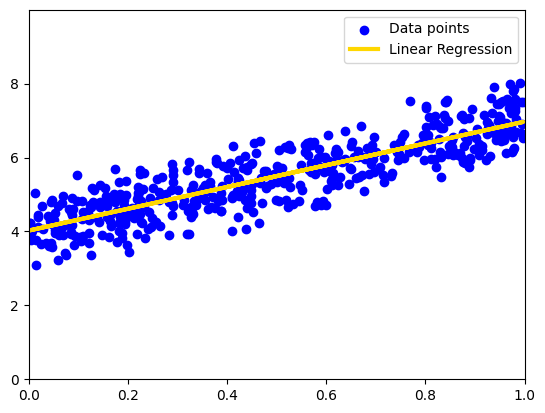

In [294]:
# Predicted values for the entire dataset
y_pred = w_1 * X + w_0

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the fitted line
plt.plot(X, y_pred, color='gold', linewidth=3, label='Linear Regression')

# Set the x and y axis limits
plt.xlim(0, 1.0)
plt.ylim(0, 10)

# Set the x and y axis ticks with specified intervals
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 10, 2))

# Add labels and legend
plt.legend()

# Show the plot 
plt.show()
